#  Automated crypto website data pull

Development of a script for collecting data on cryptocurrency rates on the site https://coinmarketcap.com/

Visualization of data on quotes for different periods of time.

In [5]:
# Import libraries

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time, sleep
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#Make a function for API connection and pulling data into csv file

def api_runner():
    global df
    #API connection
    # The code below is taken from API documentation https://coinmarketcap.com/api/documentation/v1/#section/Quick-Start-Guide
    # The API URL is taken from https://coinmarketcap.com/api/documentation/v1/#section/Quick-Start-Guide
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    
    #Set selection parameters
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }

    #The API key is taken from https://pro.coinmarketcap.com/account/
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd9847e9d-525e-4517-8dfb-43720a64598b', #
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #Convert data from json to data frame
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
   
    #Write df into csv file
    if not os.path.isfile(r'API.csv'):
        df.to_csv('API.csv', header='column_names')
    else:
        df.to_csv('API.csv', mode='a', header=False)
    
# If you faced the problem "IOPub data rate exceeded" then use instructions - https://www.drjamesfroggatt.com/python-and-neural-networks/iopub-data-rate-exceeded-the-notebook-server-will-temporarily-stop-sending-output-to-the-client-in-order-to-avoid-crashing-it/

#In short:
# 1. Open anaconda prompt powershell
# 2. Enter the command: jupyter notebook --generate-config
# 3. Then open generated config file and uncomment the line: #c.NotebookApp.iopub_data_rate_limit = 1000000
# 4. Add a zero in the end of the line: c.NotebookApp.iopub_data_rate_limit = 10000000
# 5. Save file, close down your Jupyter Notebook, Anaconda and anything related to it and restart.    

In [23]:
#The finction runner

for i in range(10): #You can change this number to set the desired volume of data.
    api_runner()
    print('API runner completed')
    sleep(60) #Pause between requests in seconds. You can change this number to set the desired frequency of data acquisition.


API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed
API runner completed


In [7]:
#View the data
API = pd.read_csv('API.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x) #Convert float values to human-readable format
pd.set_option('display.max_columns', None) #Display all dataset columns
API

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9813,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19196818.00000,19196818.00000,NaN,1,NaN,NaN,NaN,2022-11-03T04:39:00.000Z,20352.21442,56255880986.17628,44.85510,0.14940,-0.87744,-2.02219,3.79142,2.93067,-12.12893,390697756058.19073,38.70140,427396502754.88000,NaN,2022-11-03T04:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 04:40:29.480472+00:00
1,1,1027,Ethereum,ETH,ethereum,6168,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,NaN,2022-11-03T04:39:00.000Z,1553.08643,24381194958.30921,74.17380,0.09412,-2.42623,-0.13582,16.72101,0.10725,-6.33164,190057186658.36511,18.82650,190057186658.37000,NaN,2022-11-03T04:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 04:40:29.480472+00:00
2,2,825,Tether,USDT,tether,41493,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,69350342913.25587,72141766321.66891,NaN,3,NaN,NaN,NaN,2022-11-03T04:39:00.000Z,0.99998,79031910735.26997,43.19310,-0.00035,0.00188,-0.02586,-0.01511,-0.00802,-0.01243,69348695445.30133,6.86410,72140052541.42000,NaN,2022-11-03T04:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-03 04:40:29.480472+00:00
3,3,1839,BNB,BNB,bnb,1132,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159977716.84720,159979963.59043,NaN,4,NaN,NaN,NaN,2022-11-03T04:39:00.000Z,324.42736,1415651409.52787,22.51210,0.37444,-0.56473,11.76146,12.78415,16.85709,3.64763,51901148437.54018,5.14120,64885472127.49000,NaN,2022-11-03T04:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 04:40:29.480472+00:00
4,4,3408,USD Coin,USDC,usd-coin,6653,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,42542266647.89060,42542266647.89060,NaN,5,NaN,NaN,NaN,2022-11-03T04:39:00.000Z,1.00018,6206526616.63798,83.35610,-0.00245,0.01173,0.03334,0.01098,0.01543,0.03429,42550101226.70766,4.21490,42550101226.71000,NaN,2022-11-03T04:39:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-03 04:40:29.480472+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,10,3890,Polygon,MATIC,polygon,504,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'scaling'...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,11,NaN,NaN,NaN,2022-11-03T04:48:00.000Z,0.96550,848239037.25774,158.31150,1.99673,10.65471,3.55597,18.67697,9.20101,4.88356,8432959666.36215,0.83480,9654972687.02000,NaN,2022-11-03T04:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 04:49:40.025693+00:00
146,11,6636,Polkadot,DOT,polkadot-new,421,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1132728275.39868,1248551945.72386,NaN,12,904869778.00000,5831522065.51604,NaN,2022-11-03T04:48:00.000Z,6.44460,380958971.30689,55.81270,0.27646,0.22879,-1.01056,1.22170,-11.77906,-23.16968,7299978508.31230,0.72260,8046415515.75000,NaN,2022-11-03T04:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-03 04:49:40.025693+00:00
147,12,5994,Shiba Inu,SHIB,shiba-inu,433,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,549063278876301.93750,589735030408322.75000,NaN,13,Na

In [8]:
#Group data by cryptocurrency names. Take mean values for each selected feature.

groupped = API.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_90d']].mean()
groupped

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.14889,-0.83405,-2.05799,3.79184,-12.07992
Ethereum,0.18368,-2.32789,-0.13417,16.73145,-6.25820
Tether,0.00201,0.00729,-0.02356,-0.01315,-0.01086
BNB,0.46163,-0.37894,11.85237,12.94378,3.74457
USD Coin,-0.01273,0.00384,0.02389,0.00379,0.03239
XRP,0.11050,-0.77589,-3.77981,0.42343,21.70892
Binance USD,0.00972,-0.01356,0.01503,0.01444,0.01920
Dogecoin,1.06264,-6.64101,72.47933,122.48538,96.52384
Cardano,0.05146,-0.94024,-2.70135,-7.61474,-22.59660


In [18]:
#Transform the data into a more convenient form
stacked = groupped.stack().to_frame(name='values')

#Then add an index and a name for column with quotes
#index = pd.Index(range(stacked.count().values[0]))
stacked = stacked.reset_index()
stacked = stacked.rename(columns={'level_1':'percent_change'})

#And then replace values in a 'percent_change' column to make them more convenient for graphs
stacked['percent_change'] = stacked['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '90d'])
stacked

,name,percent_change,values
0,Bitcoin,1h,0.14889
1,Bitcoin,24h,-0.83405
2,Bitcoin,7d,-2.05799
3,Bitcoin,30d,3.79184
4,Bitcoin,90d,-12.07992
...,...,...,...
70,TRON,1h,-0.01081
71,TRON,24h,-1.68041
72,TRON,7d,-3.14084
73,TRON,30d,1.14287


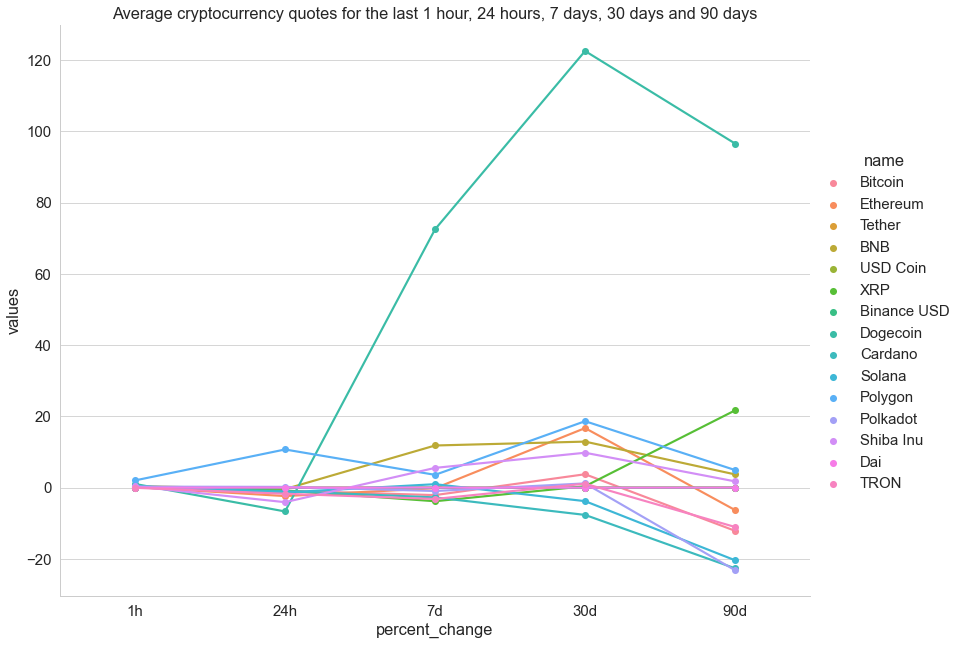

In [34]:
#Visualize the data
                                                                                                                                             
sns.set(style='whitegrid', rc={"grid.linewidth": 0.2})
sns.set_context("paper", font_scale=1.7)                                                  
sns.catplot(x='percent_change', y='values', hue='name', 
            data=stacked, kind='point', height=9, aspect=1.3).set(title='Average cryptocurrency quotes for the last 1 hour, 24 hours, 7 days, 30 days and 90 days');

In [69]:
#Now let's look at the bitcoin data. How did the price change during our observations.

pd.options.mode.chained_assignment = None 

def totime(data):
    return data.strftime('%Y-%m-%d %H:%M:%S')

usd_price = API[['name', 'quote.USD.price', 'timestamp']]
usd_price['time'] = pd.to_datetime(usd_price['timestamp'])
usd_price['time'] = usd_price['time'].apply(totime)
btc_price = usd_price.query("name == 'Bitcoin'")
btc_price

,name,quote.USD.price,timestamp,time
0,Bitcoin,20352.21442,2022-11-03 04:40:29.480472+00:00,2022-11-03 04:40:29
15,Bitcoin,20350.06155,2022-11-03 04:41:30.771053+00:00,2022-11-03 04:41:30
30,Bitcoin,20348.43152,2022-11-03 04:42:31.726382+00:00,2022-11-03 04:42:31
45,Bitcoin,20348.49469,2022-11-03 04:43:32.957946+00:00,2022-11-03 04:43:32
60,Bitcoin,20348.49469,2022-11-03 04:44:33.752138+00:00,2022-11-03 04:44:33
75,Bitcoin,20354.34953,2022-11-03 04:45:34.777806+00:00,2022-11-03 04:45:34
90,Bitcoin,20353.58159,2022-11-03 04:46:35.833868+00:00,2022-11-03 04:46:35
105,Bitcoin,20353.58159,2022-11-03 04:47:37.117611+00:00,2022-11-03 04:47:37
120,Bitcoin,20360.35866,2022-11-03 04:48:38.886595+00:00,2022-11-03 04:48:38
135,Bitcoin,20360.81728,2022-11-03 04:49:40.025693+00:00,2022-11-03 04:49:40


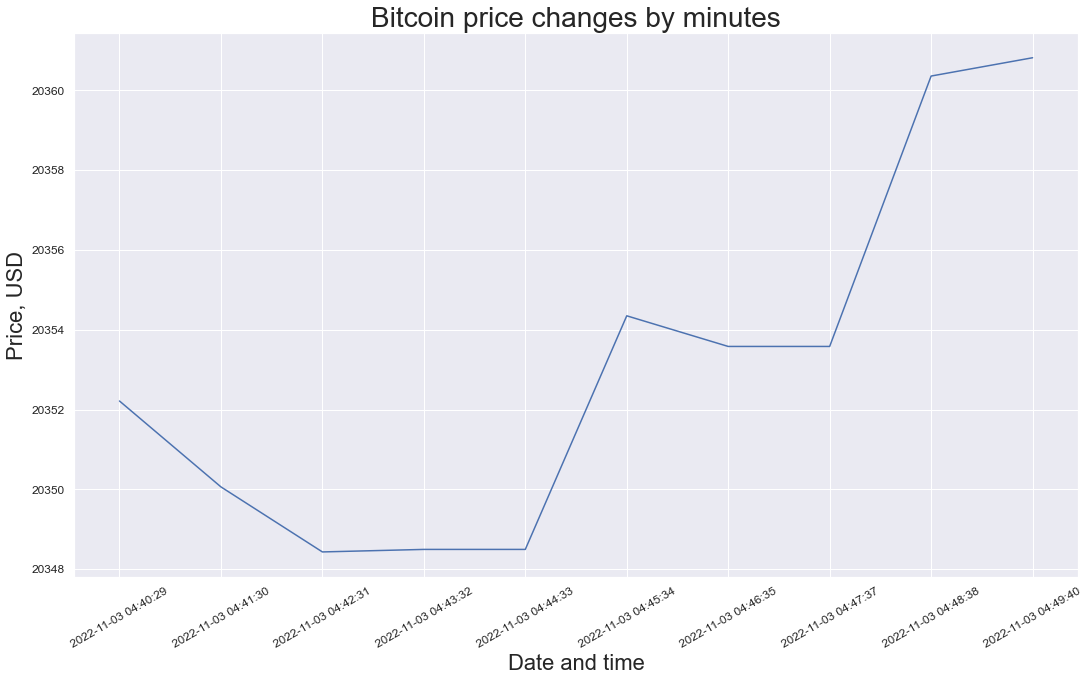

In [70]:
#Visualize the bitcoin price changes during our observations

sns.set_theme(style='darkgrid');
sns.set_context("paper", font_scale=1.9) ;
sns.set(rc={'figure.figsize':(18,10)});
b = sns.lineplot(x='time', y='quote.USD.price', data=btc_price);
b.axes.set_title("Bitcoin price changes by minutes",fontsize=28)
b.set_xlabel("Date and time",fontsize=22)
b.set_ylabel("Price, USD",fontsize=22)
b.tick_params(labelsize=12)
locs, labels = plt.xticks();
plt.setp(labels, rotation=30);
plt.show()